## Preparación del entorno

In [27]:
%matplotlib inline
import numpy as np

import sklearn

import pandas as pd

Si el entorno está correctamente instalado, las líneas de código anteriores deben importar los paquetes sin ningún error.

Nota: para el resto de las preguntas y soluciones de código, puede ingresar más celdas si lo considera necesario.


## Carga y estudio de datos

Cargue los datos desde el archivo *adult_data.csv*. Para esto puede utilizar la librería *pandas* con su función *read_csv*.

In [28]:
df = pd.read_csv('adult_data.csv',skipinitialspace=True)

Imprima los nombres de las columnas (atributos), e investigue la documentación para entender que significa cada uno de ellos.

In [29]:
df.columns

Index([u'age', u'workclass', u'fnlwgt', u'education', u'education-num',
       u'marital-status', u'occupation', u'relationship', u'race', u'sex',
       u'capital-gain', u'capital-loss', u'hours-per-week', u'native-country',
       u'income'],
      dtype='object')

**PREGUNTA: A continuación realice algunas conjeturas de cuáles pueden llegar a ser los atributos de mayor utilidad para predecir el nivel de ingresos (income) de una persona.**

**RESPUESTA: Suponemos que los atributos de mayor utilidad deben ser capital-gain y capital-loss, ya que el capital debe estar fuertemente relacionado con el ingreso. Además consideramos que education y occupation también pueden ser útiles para predecir el ingreso de una persona.**

## Extracción de atributos

Separar la columna **income** en un array **y** que será utilizada como atributo clase:

In [30]:
y = np.array(df.income)

Eliminar la columna **fnlwgt** ya que no aporta a la solución del problema. También eliminar la columna **education-num** ya que duplica la información de la columna 'education'. Por último, eliminar la columna **income** ya que es la columna que contiene la clase que se pretende predecir:

In [31]:
del df['fnlwgt']
del df['education-num']
del df['income']

Los atributos cuyos valores son categorías ('workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'), deben de transformarse a valores numéricos para poder ser utilizados como entradas en los modelos de scikit-learn.

**PREGUNTA: Por qué no es apropiado transformar un atributo de categoría en simples índices numéricos?**

**RESPUESTA: Porque se generaría una relación de órden y magnitud inexistente que el algoritmo de aprendizaje podría tomar en cuenta.**

Utilice las clases *LabelEncoder* y *OneHotEncoder* del paquete *preprocessing* de *sklearn* para transformar los atributos de categorías en atributos numéricos. Guarde los datos de entrada en una matriz **X**.

In [32]:
import sklearn.preprocessing

aTransformar = ['workclass', 'education', 'marital-status', 'sex','occupation', 'native-country', 'relationship', 'race']

le = {}

for t in aTransformar:
    le[t] = sklearn.preprocessing.LabelEncoder()
    le[t].fit(df[t])
    df[t] = le[t].transform(df[t])
    
features = [df.columns.get_loc(f) for f in aTransformar]

ohe = sklearn.preprocessing.OneHotEncoder(categorical_features=features, sparse=False)
X = ohe.fit_transform(df)

In [33]:
X

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          2.17400000e+03,   0.00000000e+00,   4.00000000e+01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   1.30000000e+01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   4.00000000e+01],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   4.00000000e+01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   6.00000000e+01],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   5.50000000e+01]])

**PREGUNTA: Cuántos y cuáles son los nuevos atributos del dataset?**

**RESPUESTA: El dataset pasa a tener 103 atributos. Algunos de estos atributos no tienen nombre en principio, pero los nombramos usando el nombre del atributo original del que provienen y el valor que representan.**

In [34]:
len(X[0])

103

In [35]:
def obtenerNombreFeature(i):
    
    if i >= ohe.feature_indices_[-1]:
        
        noCategoricalIndex = i - ohe.feature_indices_[-1]
        
        j = -1
        n = -1
        while j != noCategoricalIndex:
            n += 1
            if df.columns[n] not in aTransformar:
                j += 1
        return df.columns[n]

    else:
        enumerated_features = reversed([x for x in enumerate(ohe.feature_indices_)])
        pos, categoria = next((pos, j) for (pos, j) in enumerated_features if j <= i)
        nombreCategoria = df.columns[sorted(ohe.categorical_features)[pos]]
        
        etiqueta = i - categoria
        nombreEtiqueta = le[nombreCategoria].classes_[etiqueta]
        
        return nombreCategoria + "/" + nombreEtiqueta

print([obtenerNombreFeature(i) for i in range(len(X[0]))])
        

['workclass/?', 'workclass/Federal-gov', 'workclass/Local-gov', 'workclass/Private', 'workclass/Self-emp-inc', 'workclass/Self-emp-not-inc', 'workclass/State-gov', 'workclass/Without-pay', 'education/10th', 'education/11th', 'education/12th', 'education/1st-4th', 'education/5th-6th', 'education/7th-8th', 'education/9th', 'education/Assoc-acdm', 'education/Assoc-voc', 'education/Bachelors', 'education/Doctorate', 'education/HS-grad', 'education/Masters', 'education/Preschool', 'education/Prof-school', 'education/Some-college', 'marital-status/Divorced', 'marital-status/Married-AF-spouse', 'marital-status/Married-civ-spouse', 'marital-status/Married-spouse-absent', 'marital-status/Never-married', 'marital-status/Separated', 'marital-status/Widowed', 'occupation/?', 'occupation/Adm-clerical', 'occupation/Armed-Forces', 'occupation/Craft-repair', 'occupation/Exec-managerial', 'occupation/Farming-fishing', 'occupation/Handlers-cleaners', 'occupation/Machine-op-inspct', 'occupation/Other-ser

## Partición de datos

Para poder entrenar y testear un algoritmo de aprendizaje, es necesario primero particionar los datos en dos conjuntos disjuntos de entrenamiento y testeo. Separe aleatoriamente un 25% de los datos para testeo, llame a los atributos de entrada como **X_test** y al vector de salida esperado **y_test**. El 75% restante se utilizará para el entrenamiento, nombre a la matriz con los datos de entrada como **X_train** y al vector de salida correspondiente como **y_train**.
Para esto puede utilizar la función *train_test_split* del paquete *cross_validation* de *sklearn*:

In [36]:
import sklearn.cross_validation
X_train,X_test,y_train,y_test = sklearn.cross_validation.train_test_split(X,y, test_size=0.25)

Examine el tamaño de las matrices y vectores generados:

In [37]:
len(X_train)

3750

In [38]:
len(y_train)

3750

In [39]:
len(X_test)

1250

In [40]:
len(y_test)

1250

## Entrenamiento

Ahora que tenemos particionados los datos en entrenamiento y testeo, podemos comenzar a entrenar los algoritmos.

Genere un modelo 'dt' entrenando un algoritmo de árboles de decisión (ver el paquete *tree* de *sklearn*) con el vector de entrada X_train y el vector de salida y_train. Utilice los valores por defecto:

In [41]:
import sklearn.tree as tree

dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

Genere un modelo 'nb' entrenando un algoritmo de Naive Bayes (ver el paquete *naive_bayes* de *sklearn*) con el vector de entrada X_train y el vector de salida y_train. Utilice los valores por defecto:

In [42]:
import sklearn.naive_bayes as naive_bayes


nb = naive_bayes.GaussianNB()
nb.fit(X_train, y_train)

GaussianNB(priors=None)

Genere un modelo 'svc' entrenando un algoritmo de Support Vector Machines (ver el paquete *svm* de *sklearn*) con el vector de entrada X_train y el vector de salida y_train. Utilice los valores por defecto:

In [43]:
import sklearn.svm as svm

svc = svm.SVC()
svc.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Testing

Luego de tener los modelos entrenados, podemos medir qué tan bien funcionan los modelos (su capacidad de predicción) utlizando medidas standard como accuracy, precision, recall y medida-f.

**PREGUNTA: De la definición de cada una de las medidas de perfomance (accuracy, precision, recall y medida-f)**

**RESPUESTA:**
Accuracy: Se define como el numero de predicciones correctas divididas entre el numero total de predicciones hechas y multiplicadas por 100 para convertirse en un porcentaje.

Precision:Es el número de Verdaderos Positivos dividido entre la suma de los Verdaderos Positivos y los Falsos Positivos, dicho en otras palabras es el numero de predicciones positivas sobre el numero de valores de clase positivos predichos.

Recall: Es el número de Verdaderos Positivos dividido entre la suma de los Verdaderos Positivos y los Falsos Negativos. Es el numero de predicciones positivas dividido entre el numero de valores positivos en los datos del test.

Medida-f: Se calcula como 2*((precision*recall)/(precision+recall)) y representa el balance entre recall y la precisión.

Implemente una función 'imprimir_performance' que dado un vector de entrada 'X', un vector de salida 'y', y un clasificador 'clf':
- Realice la predicción para el vector de entrada X.
- Imprima la medida de accuracy.
- Imprima precision, recall y medida f de cada clase.
- Imprima la matriz de confusión.

Para esto puede utilizar el paquete *metrics* de *sklearn*.

In [44]:
import sklearn.metrics as metrics
import numpy as np

def imprimir_performance(X, y, clf):
    # predicciones = np.array([clf.predict(np.array(x).reshape(1,-1)) for x in X.values])
    predicciones = clf.predict(np.array(X))
        
    print("Accuracy: " + str(metrics.accuracy_score(y, predicciones)))
    
    for l in [' <=50K', ' >50K']:
        print("Label " + l)
        print("   Precision: " + str(metrics.precision_score(y, predicciones, pos_label=l)))
        print("   Recall: " + str(metrics.recall_score(y, predicciones, pos_label=l)))
        print("   Medida-f: " + str(metrics.f1_score(y, predicciones, pos_label=l)))
        
    print("Confussion matrix:\n" + str(metrics.confusion_matrix(y, predicciones)))

Utilice la función **imprimir_performance** para imprimir las medidas de performance para el clasificador **dt** basado en árboles de decisión:

In [45]:
imprimir_performance(X_test, y_test, dt)

Accuracy: 0.8128
Label  <=50K


ValueError: pos_label=' <=50K' is not a valid label: array(['<=50K', '>50K'], 
      dtype='|S5')

Utilice la función **imprimir_performance** para imprimir las medidas de performance para el clasificador **nb** basado en Naive Bayes:

In [46]:
imprimir_performance(X_test, y_test, nb)

Accuracy: 0.8
Label  <=50K


ValueError: pos_label=' <=50K' is not a valid label: array(['<=50K', '>50K'], 
      dtype='|S5')

Utilice la función **imprimir_performance** para imprimir las medidas de performance para el clasificador **svc** basado en Support Vector Machines:

In [23]:
imprimir_performance(X_test, y_test, svc)

Accuracy: 0.8304
Label  <=50K


ValueError: pos_label=' <=50K' is not a valid label: array(['<=50K', '>50K'], 
      dtype='|S5')

**PREGUNTA: Realice un breve análisis de los resultados obtenidos.**

**RESPUESTA:**

## Validación cruzada

Entrene y mida la perfomance de los calsifificadores anteriores, pero ahora utilizando el algoritmo de validación cruzada (cross validation) tomando 5 particiones. Imprima el promedio de accuracy obtenido para cada modelo:

In [47]:
import sklearn.model_selection as ms

cross = ms.KFold(n_splits=5)

clfs = [("DT", tree.DecisionTreeClassifier()), ("NB", naive_bayes.GaussianNB()), ("SVC",  svm.SVC())]

performances = {}

for nombre, clf in clfs:
    
    sumAcc = 0
    
    for train, test in cross.split(X_train, y_train):
           
        clf.fit(X_train[train],y_train[train])
        predicciones = clf.predict(X_train[test])
        sumAcc += metrics.accuracy_score(y_train[test], predicciones)
    
    performances[nombre] = sumAcc/5
    
    print("Accuracy " + nombre + ": " + str(sumAcc/5))
    

Accuracy DT: 0.7944
Accuracy NB: 0.784
Accuracy SVC: 0.818666666667


**PREGUNTA: Describa brevemente cuáles son las ventajas de utilizar validación cruzada en vez de realizar una único esquema de partición como se hizo al principio.**

**RESPUESTA: La ventaja principal de utilizar el método de validación cruzada es que todos los ejemplos presentes en la muestra son usados para la etapa de testeo y la mayoría de estos para la etapa de entrenamiento del modelo.**

## Mejorando los resultados

Existen varias técnicas que pueden ser utilizadas para mejorar los resultados de nuestros modelos. A continuación utilizaremos técnias de **selección de atributos** y de **ajuste de hiperparámetros**.

## Selección de atributos

En nuestros entrenamientos hemos utilizado todos los atributos disponibles para entrenar nuestros modelos. Pero no siempre esto lleva a los mejores resultados, de hecho muchas veces, trabajar con un conjunto reducido de atributos devuelve mejores resultados.

**PREGUNTA: Investigue de qué se trata la técnica de selección de atributos (feature selection) y argumente brevemente por qué puede mejorar la performance de un algoritmo de aprendizaje automático.**

**RESPUESTA: La técnica de selección de atributos consiste en la disminución del espacio total de atributos, quitando los irrelevantes o redundantes. Es decir escoger un subconjunto de atributos mínimo tal que no decrezca significativamente la tasa de aciertos. Esto mejoraría la eficiencia de los algoritmos ya que al contener menos datos las iteraciones se realizarian mas deprisa y los resultados serían visibles en menos tiempo.  **

Utilizando el paquete *feature_selection* de *sklearn*, seleccione e imprima la lista de los 20 mejores atributos según la medida estadística chi^2:

In [48]:
import sklearn.feature_selection as fs

selector = fs.SelectKBest(fs.chi2,k=20)
selector.fit_transform(X_train, y_train).astype(np.int32)

array([[   0,    0,    0, ..., 7896,    0,   40],
       [   0,    1,    0, ...,    0,    0,   40],
       [   0,    0,    0, ...,    0,    0,   12],
       ..., 
       [   0,    0,    0, ...,    0,    0,   40],
       [   0,    0,    0, ...,    0,    0,   30],
       [   0,    0,    0, ...,    0,    0,   40]], dtype=int32)

Intente obtener la lista de los mejores N atributos, donde N sea la cantidad mínima posible de atributos que mantenga o mejore las medidas de performance obtenidas con validación cruzada:

DT
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False]
NB
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 

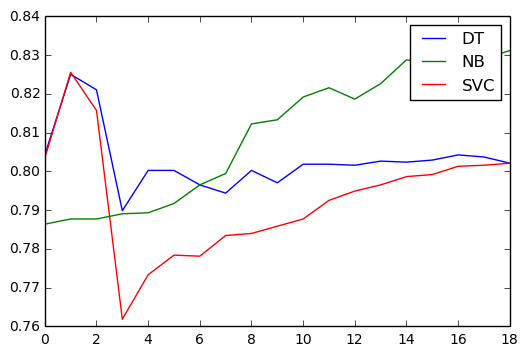

In [49]:
import matplotlib
import matplotlib.pyplot as plt

def realizarCV(clf, X, y):
    
    cross = ms.KFold(n_splits=5)
    sumAcc = 0
    
    for train, test in cross.split(X, y):
        
        clf.fit(X[train],y[train])
        predicciones = clf.predict(np.array(X[test]))
        sumAcc += metrics.accuracy_score(y[test], predicciones)
    
    return sumAcc / 5

plt.clf()
selectores = {}

for nombre, clf in clfs:

    performanceTarget = realizarCV(clf, X_train, y_train)
    nuevasPerformances = []
    mejoresAtributos = []
    
    for n in xrange(1,20):
        kSelector = fs.SelectKBest(fs.chi2,k=n)
        X_filtered = kSelector.fit_transform(X_train, y_train).astype(np.int32)
        res = realizarCV(clf, X_filtered, y_train)
        
        if len(mejoresAtributos) == 0 and res > performances[nombre]:
            mejoresAtributos = kSelector.get_support()
            selectores[nombre] = kSelector

        nuevasPerformances.append(res)
    
    print(nombre)
    print(mejoresAtributos)
    plt.plot(nuevasPerformances, label=nombre)
    
    
plt.legend()
plt.show()

Con el conjunto de atributos obtenido, entrene los clasificadores nuevamente y verifique que las medidas de precision, recall mejoran en general:

In [50]:
for nombre, clf in clfs:
    X_selected = selectores[nombre].transform(X_train)
    X_test_selected = selectores[nombre].transform(X_test)
    clf.fit(X_selected,y_train)
    imprimir_performance(X_test_selected, y_test,clf)

Accuracy: 0.8072
Label  <=50K


ValueError: pos_label=' <=50K' is not a valid label: array(['<=50K', '>50K'], 
      dtype='|S5')

## Ajuste de hiperparámetros

Por lo general, cada algoritmo y modelo de aprendizaje automático posee parámetros configurables. Estos parámetros se los suele denominar 'hiperparámetros' del algoritmo, ya que son parámetros que el algoritmo no ajusta automáticamente, sino que son ajustados por el "usuario".

La correcta selección de estos hiperparámetros por lo general tiene una gran incidencia en la performance de los algoritmos.

**PREGUNTA: Para los modelos generados anteriormente (Árbol de decisión, Naive Bayes y Support Vector Machines), investigue en la documentación de scikit-learn cuáles son sus hiperparámetros y qué valores toman. A continuación liste y de una breve descripción de cada uno:**

**RESPUESTA:**


Pruebe diferentes configuraciones de hiperparámetros para los modelos anteriores de modo de mejorar los resultados de performance obtenidos mediante la función *imprimir_performance*.

Para esto puede realizarlo manualmente o buscar una estrategia más avanzada utilizando la clase *GridSearchCV* del paquete *grid_search* de *sklearn*. Esta clase permite definir una grilla de parámetros y posibles valores para luego entrenar el modelo con todas sus posibles combinaciones y devolver la configuración que retorna la mejor performance.

En caso de tener que combinar varios procesos de extracción y selección de atributos junto con un modelo de aprendizaje, se recomienda utilizar la clase *Pipeline* del paquete *pipeline* de *sklearn*.

Tener en cuenta que si la grilla es muy grande, el proceso puede requerir mucho tiempo de cómputo y memoria.

In [ ]:
import sklearn.grid_search as gs

params = {}
params["SVC"] = { 
    'C': [0.5,1,1.5],
    'kernel': ['linear', 'poly', 'rbf'],
}

params["DT"] = {
    'criterion' : ['gini', 'entropy'],
    'splitter' : ['best', 'random'],
    'max_features' : ['auto', 'log2', None],
    'min_samples_split' : [1,2,3,0.1,0.2],
    'min_samples_leaf' : [1,2,3,0.2,0.4],
    'min_impurity_split' : [1e-7,1e-8],
    'min_weight_fraction_leaf' : [0,0.1,0.2]
}
params["NB"] = {
    
}

def obtenerScorer(fn):
    return lambda estimator, X, y : fn(y, estimator.predict(np.array(X)))

def obtenerMejorEstimador(params, scorer):

    for nombre, clf in clfs:

        print("==> " + nombre)
        gridSearch = gs.GridSearchCV(clf, params[nombre], scoring=scorer)
        gridSearch.fit(X_train, y_train)
        pad = " " * len("==>  ")
        print(pad + str(gridSearch.best_score_))
        print(pad + "Best params: " + str(gridSearch.best_params_))

print("Accuracy")
obtenerMejorEstimador(params, obtenerScorer(metrics.accuracy_score))
print("Precision")
obtenerMejorEstimador(params, obtenerScorer(lambda y, p: metrics.precision_score(y, p, pos_label=' <=50K')))
print("Recall")
obtenerMejorEstimador(params, obtenerScorer(lambda y, p: metrics.recall_score(y, p, pos_label=' <=50K')))

**PREGUNTAS:**
- **Cuáles son los valores de los hiperparámetros con los cuales se obtienen los mejores resultados de performance?**
- **Con qué modelo se obtienen los mejores resultados de precision y recall?**

**RESPUESTA:**

**PREGUNTA: Escriba las conclusiones generales que haya obtenido de la tarea.**

**RESPUESTA: el paquete sklearn permite entrenar y verificar de forma rápida y sencilla con distintos modelos de aprendizaje automático. **

# Clasificación de Imágenes

En esta sección trabajaremos con clasificación de imágenes. Cada instancia a clasificar es una imagen con un dígito escrito a mano. El objetivo es detectar el dígito correspondiente a cada imagen. Para eso utilizaremos un dataset de *sklearn.datasets* que contiene imágenes de dígitos escritos a mano etiquetadas. Cada imagen se representa como un vector de pixeles.

Utilizar la función *load_digits* para importar los datos de dígitos escritos a mano. Inspeccionar su contenido (data, target, images y target_names), renderizar el dígito de la primera instancia del dataset:

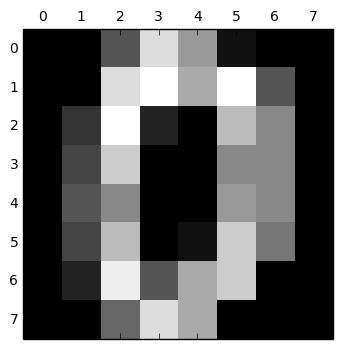

In [51]:
import sklearn.datasets as datasets

digits = datasets.load_digits()
plt.gray()
plt.matshow(digits.images[0])
plt.show()

Particionar los datos en dos conjuntos dijuntos de entrenamiento y testeo:

In [52]:
xDigitsTrain,xDigitsTest,yDigitsTrain,yDigitsTest = sklearn.cross_validation.train_test_split(digits.data,digits.target,
                                                                                              test_size =0.5)
len(digits.images)

1797

Extraer atributos de las imágenes para ser utilizados en el modelo de clasificación. Para esto, investigar las clases de Principal Component Analysis (PCA) del paquete sklearn.decomposition:

In [53]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=16)
xDigitsTrain = pca.fit_transform(xDigitsTrain,yDigitsTrain)
xDigitsTest = pca.transform(xDigitsTest)


**PREGUNTA: Explique el método de extracción de atributos y justifique su elección.**

**RESPUESTA: El método de extracción de atributos se basa en representar la entrada con una cantidad de atributos de menor dimensión que la original. Esto implica descomponer la entrada para conservar los atributos mas valiosos. Aunque esto potencialmente implica una pérdida de información, agilita los cálculos. Nosotros seleccionamos Principal Component Analysis (PCA) que realiza una descomposición SVD para proyectar la información en una menor dimensión. En particular estamos pasando de una entrada con 64 componentes a una entrada con 16 componentes.**

Elija dos algoritmos de aprendizaje y entrene e intente obtener los mejores modelos de clasificación posibles:

In [54]:
from sklearn import svm as svm
from sklearn import neural_network


svc = svm.SVC(gamma=0.001)
svc.fit(xDigitsTrain, yDigitsTrain)
predictSvc = svc.predict(xDigitsTest)

nn = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(20,20), max_iter=80000,alpha=0.001)
nn.fit(xDigitsTrain,yDigitsTrain)




MLPClassifier(activation='relu', alpha=0.001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(20, 20), learning_rate='constant',
       learning_rate_init=0.001, max_iter=80000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Imprima los mejores resultados de precision, recall y accuracy para los algoritmos seleccionados:

In [55]:
def imprimir_performance(X, y, clf):
    # predicciones = np.array([clf.predict(np.array(x).reshape(1,-1)) for x in X.values])
    predicciones = clf.predict(X)
        
    print("Accuracy: " + str(metrics.accuracy_score(y, predicciones)))
    

    for l in range(10):
        print("Label " + str(l))
        print("   Precision: " + str(metrics.precision_score(y, predicciones, average = 'micro', labels=[l])))
        print("   Recall: " + str(metrics.recall_score(y, predicciones, average = 'micro', labels=[l])))
        print("   Medida-f: " + str(metrics.f1_score(y, predicciones, average = 'micro', labels=[l])))
        
    print("Confussion matrix:\n" + str(metrics.confusion_matrix(y, predicciones, )))
    
    
imprimir_performance(xDigitsTest,yDigitsTest,svc)
imprimir_performance(xDigitsTest,yDigitsTest,nn)

Accuracy: 0.982202447164
Label 0
   Precision: 1.0
   Recall: 1.0
   Medida-f: 1.0
Label 1
   Precision: 0.922330097087
   Recall: 1.0
   Medida-f: 0.959595959596
Label 2
   Precision: 0.987951807229
   Recall: 0.931818181818
   Medida-f: 0.959064327485
Label 3
   Precision: 1.0
   Recall: 1.0
   Medida-f: 1.0
Label 4
   Precision: 0.989010989011
   Recall: 1.0
   Medida-f: 0.994475138122
Label 5
   Precision: 0.989690721649
   Recall: 0.969696969697
   Medida-f: 0.979591836735
Label 6
   Precision: 0.978260869565
   Recall: 0.989010989011
   Medida-f: 0.983606557377
Label 7
   Precision: 0.989473684211
   Recall: 1.0
   Medida-f: 0.994708994709
Label 8
   Precision: 0.988372093023
   Recall: 0.955056179775
   Medida-f: 0.971428571429
Label 9
   Precision: 0.988764044944
   Recall: 0.977777777778
   Medida-f: 0.983240223464
Confussion matrix:
[[81  0  0  0  0  0  0  0  0  0]
 [ 0 95  0  0  0  0  0  0  0  0]
 [ 0  4 82  0  0  0  0  1  1  0]
 [ 0  0  0 82  0  0  0  0  0  0]
 [ 0  0  0  0

**PREGUNTA: Analice los resultados obtenidos.**

**RESPUESTA: Ambos métodos de aprendizaje lograron buenos resultados a la hora de reconcer dígitos escritos. Sin embargo el resultado fue mejor con SVC que con la red neuronal. Se observa que la red neuronal tuvo algunas dificultades para identificar el dígito 8.**